<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Machine Learning - 2301CS621</b></center>

<center><b><h1>Lab - 9 </b></center>
<center><b><h5>K-means, K-Medoids</b></center>
<pre>    

# Step 1: Import Libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# from sklearn_extra.cluster import KMedoids

# Step 2: Load the Dataset
Load Given dataset -  StudentsPerformance.csv

In [45]:
df = pd.read_csv('StudentsPerformance.csv')

In [46]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


# Step 3: Data Overview
In this step, we examine the dataset structure, summary statistics, and check for missing values.

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [48]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [49]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# Step 4: Display PairPlot

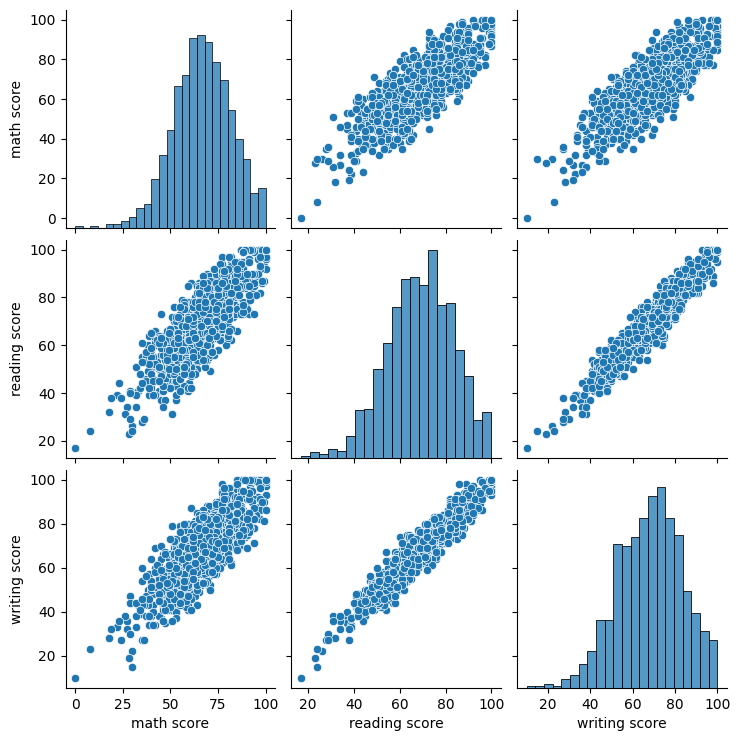

In [50]:
sns.pairplot(df)

# Step 5: Correlation heatmap

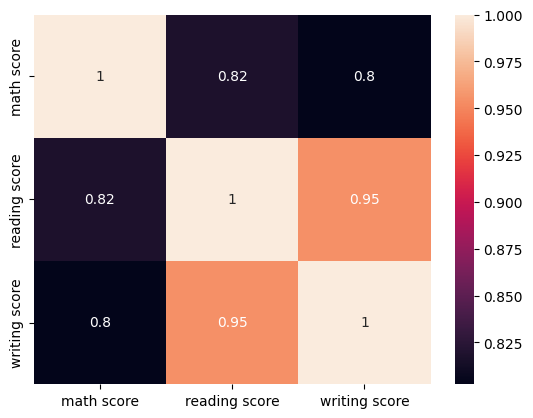

In [51]:
df_numric = df.select_dtypes(include=['number'])
sns.heatmap(df_numric.corr(), annot=True, color='blue')
plt.show()

# Step 6: Distribution of numerical features

array([[<Axes: title={'center': 'math score'}>,
        <Axes: title={'center': 'reading score'}>],
       [<Axes: title={'center': 'writing score'}>, <Axes: >]],
      dtype=object)

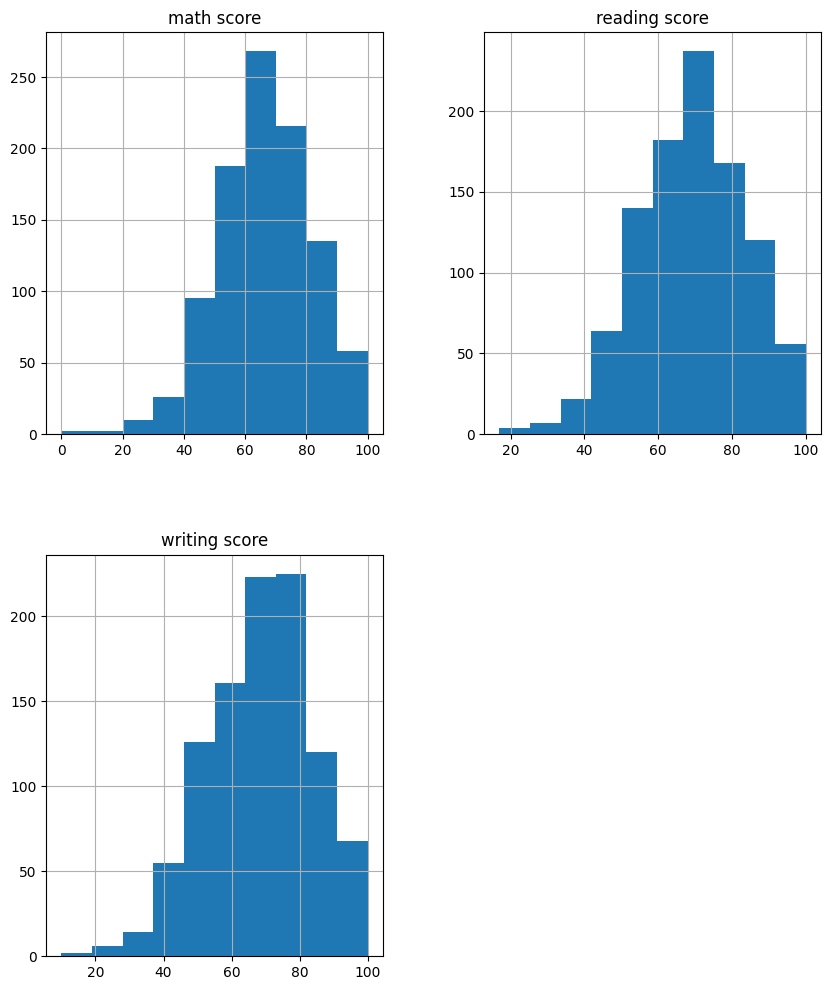

In [52]:
df.hist(figsize=(10, 12))

# Step 7: Apply StandardScaler

In [55]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.select_dtypes(include=[np.number]))

# Step 8: Elbow method to find optimal k

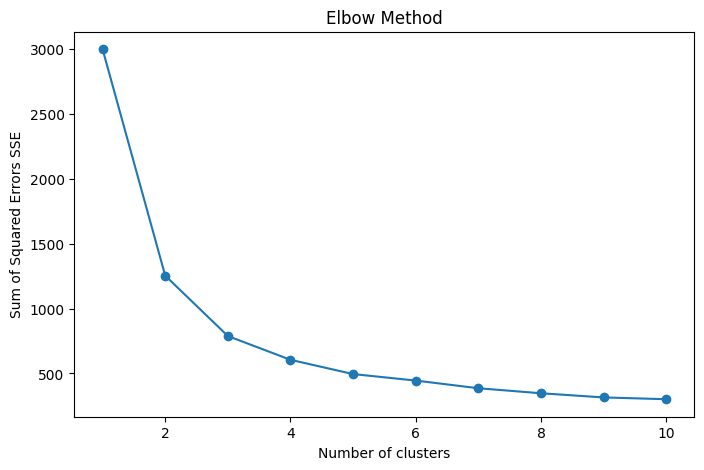

In [56]:
sse = []
k_range = range(1,11)
for k in k_range:
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors SSE')
plt.show()



# Step 9:Based on the elbow plot, choose an appropriate k value (e.g., k=3)

In [57]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_features)

# Step 10: Print Cluster Center

In [62]:
kmeans.cluster_centers_

array([[-0.04951336, -0.04870596, -0.01529686],
       [-1.18720058, -1.26762535, -1.28838441],
       [ 1.03099793,  1.09485536,  1.06358515]])

# Step 11: Plot Cluster

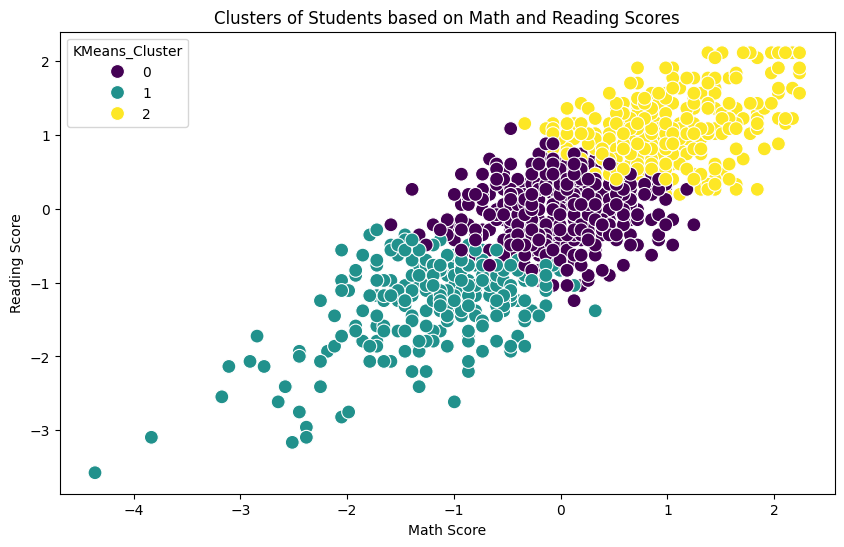

In [69]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_features[:,0], y=scaled_features[:,1], hue=df['KMeans_Cluster'], palette='viridis',s=100)
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.title('Clusters of Students based on Math and Reading Scores')
plt.show()

# Step 12:Analyze clusters 

In [76]:
df['total'] = df['math score'] + df['reading score'] + df['writing score']

In [77]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,KMeans_Cluster,total
0,female,group B,bachelor's degree,standard,none,72,72,74,0,218
1,female,group C,some college,standard,completed,69,90,88,2,247
2,female,group B,master's degree,standard,none,90,95,93,2,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,1,148
4,male,group C,some college,standard,none,76,78,75,2,229
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,2,282
996,male,group C,high school,free/reduced,none,62,55,55,1,172
997,female,group C,high school,free/reduced,completed,59,71,65,0,195
998,female,group D,some college,standard,completed,68,78,77,0,223


In [85]:
gdf = df.groupby('KMeans_Cluster')

for index,data in gdf:
    print(data.total.mean())
    print(data.total.min(), data.total.max())
    print("-----"*10)

201.61851015801355
175 226
--------------------------------------------------
147.25301204819277
27 175
--------------------------------------------------
251.0681818181818
226 300
--------------------------------------------------


# Step 13: Perform K-Medoids

In [1]:
from sklearn_extra.cluster import KMedoids


In [ ]:
# %pip install distutils

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement distutils (from versions: none)
ERROR: No matching distribution found for distutils


# Step:14 Comparison of K-means and K-medoids Clusters

# Step: 15 Implement K- Means with Library
# Sample data points
data = [
    [1, 2], [2, 3], [3, 4],
    [10, 11], [11, 12], [12, 13],
    [50, 51], [51, 52], [52, 53]
]